In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())


   layer_height  wall_thickness  infill_density infill_pattern  \
0          0.02               8              90           grid   
1          0.02               7              90      honeycomb   
2          0.02               1              80           grid   
3          0.02               4              70      honeycomb   
4          0.02               6              90           grid   

   nozzle_temperature  bed_temperature  print_speed material  fan_speed  \
0                 220               60           40      abs          0   
1                 225               65           40      abs         25   
2                 230               70           40      abs         50   
3                 240               75           40      abs         75   
4                 250               80           40      abs        100   

   roughness  tension_strenght  elongation  
0         25                18         1.2  
1         32                16         1.4  
2         40     

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode infill_pattern and material
data['infill_pattern'] = LabelEncoder().fit_transform(data['infill_pattern'])
data['material'] = LabelEncoder().fit_transform(data['material'])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_cols = ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature',
                  'bed_temperature', 'print_speed', 'fan_speed']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
X = data.drop(['roughness'], axis=1)
y = data['roughness']


In [ ]:
X = data.drop(['tension_strenght', 'elongation'], axis=1)
y_tension = data['tension_strenght']
y_elongation = data['elongation']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 117.23355000000008
R2 Score: 0.9747335497177735


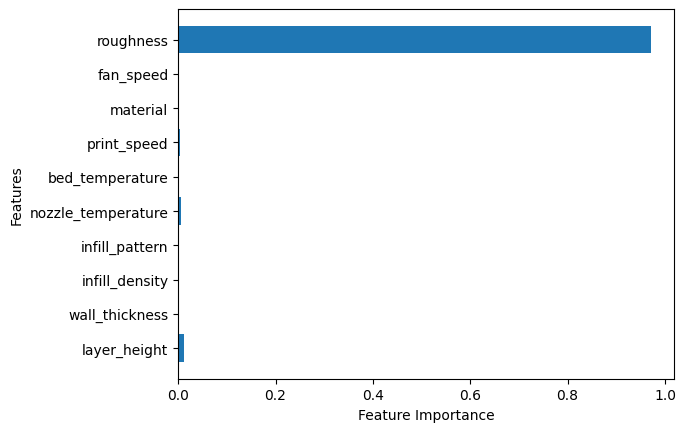

In [ ]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


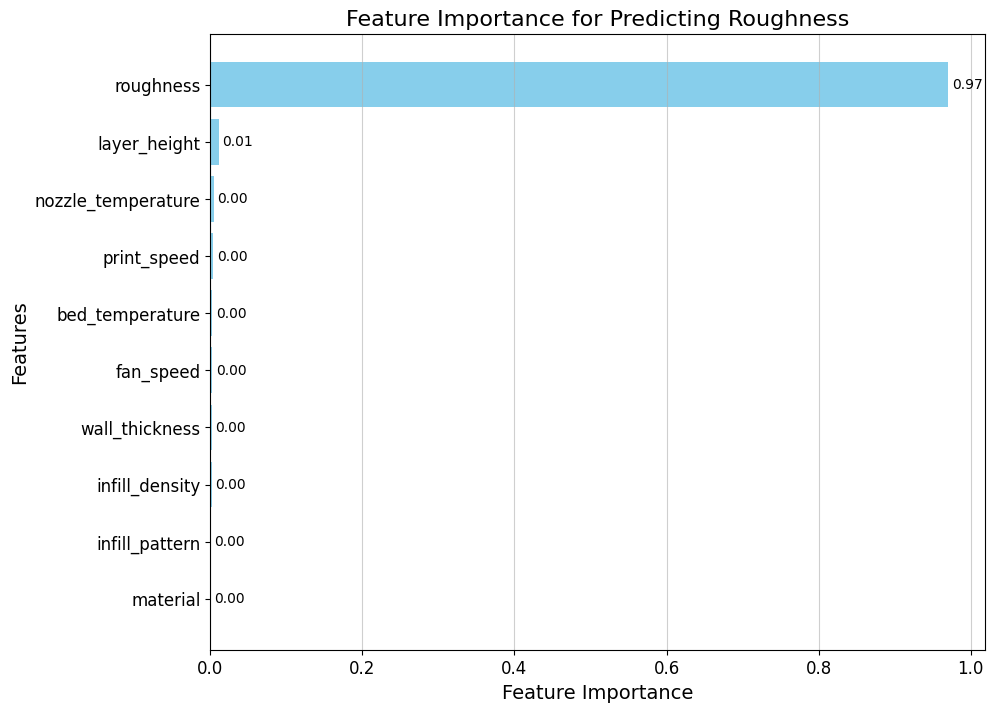

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is the trained Random Forest model and 'X' contains the feature columns
feature_importances = model.feature_importances_
features = X.columns

# Sort features by importance for better visualization
sorted_idx = np.argsort(feature_importances)
sorted_features = [features[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Create the enhanced bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_features, sorted_importances, color='skyblue')

# Add data labels
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=10, color='black')

# Add grid and labels
plt.grid(axis='x', alpha=0.6)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance for Predicting Roughness', fontsize=16)

# Adjust tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


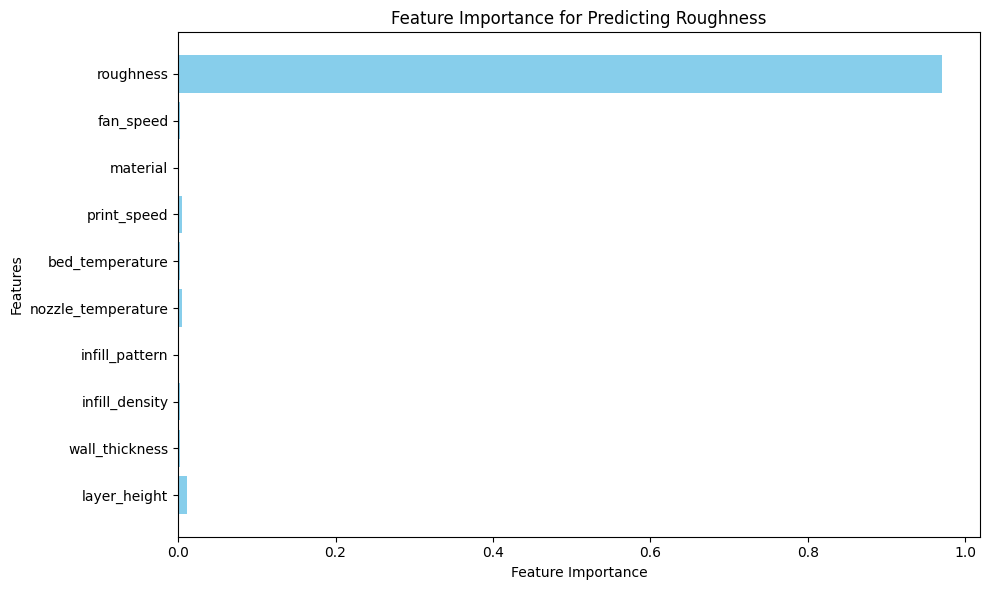

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is the trained Random Forest model and 'X' contains the feature columns
feature_importances = model.feature_importances_
features = X.columns

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Predicting Roughness')
plt.tight_layout()
plt.show()


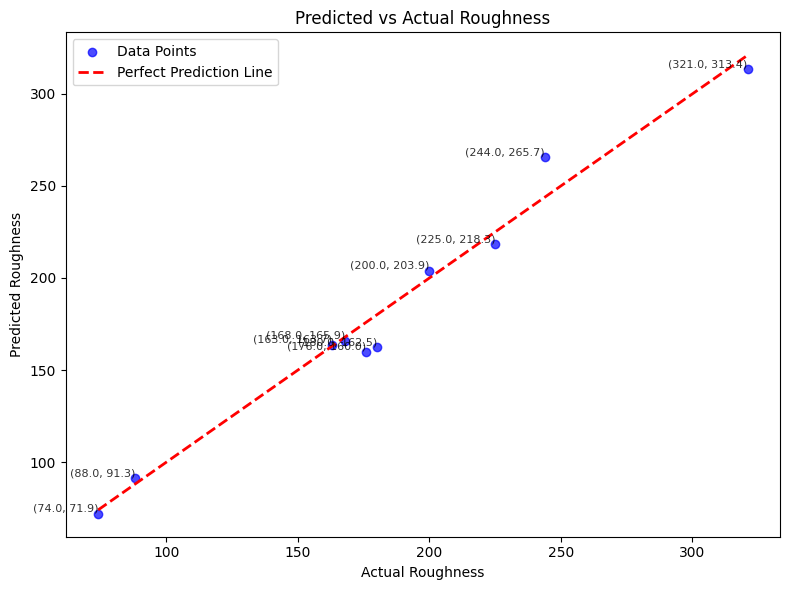

In [ ]:
# Ensure y_test and y_pred are numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Scatter plot with data labels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Data Points')

# Add data labels
for i in range(len(y_test)):
    plt.text(y_test[i], y_pred[i], f'({y_test[i]:.1f}, {y_pred[i]:.1f})',
             fontsize=8, ha='right', va='bottom', color='black', alpha=0.8)

# Add perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel('Actual Roughness')
plt.ylabel('Predicted Roughness')
plt.title('Predicted vs Actual Roughness')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


KeyError: 0

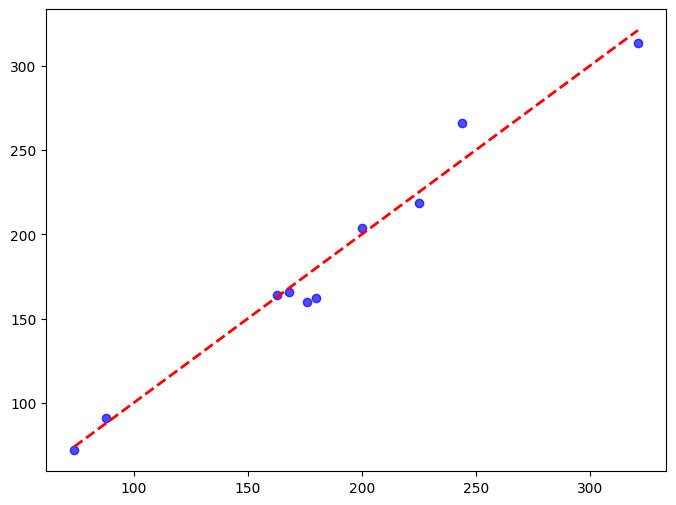

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for predicted vs actual roughness
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction Line')  # Perfect prediction line

# Add data labels to each point
for i in range(len(y_test)):
    plt.text(y_test[i], y_pred[i], f'({y_test[i]:.1f}, {y_pred[i]:.1f})', fontsize=8, ha='right', va='bottom', color='black', alpha=0.8)

# Adding labels, title, and legend
plt.xlabel('Actual Roughness')
plt.ylabel('Predicted Roughness')
plt.title('Predicted vs Actual Roughness')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


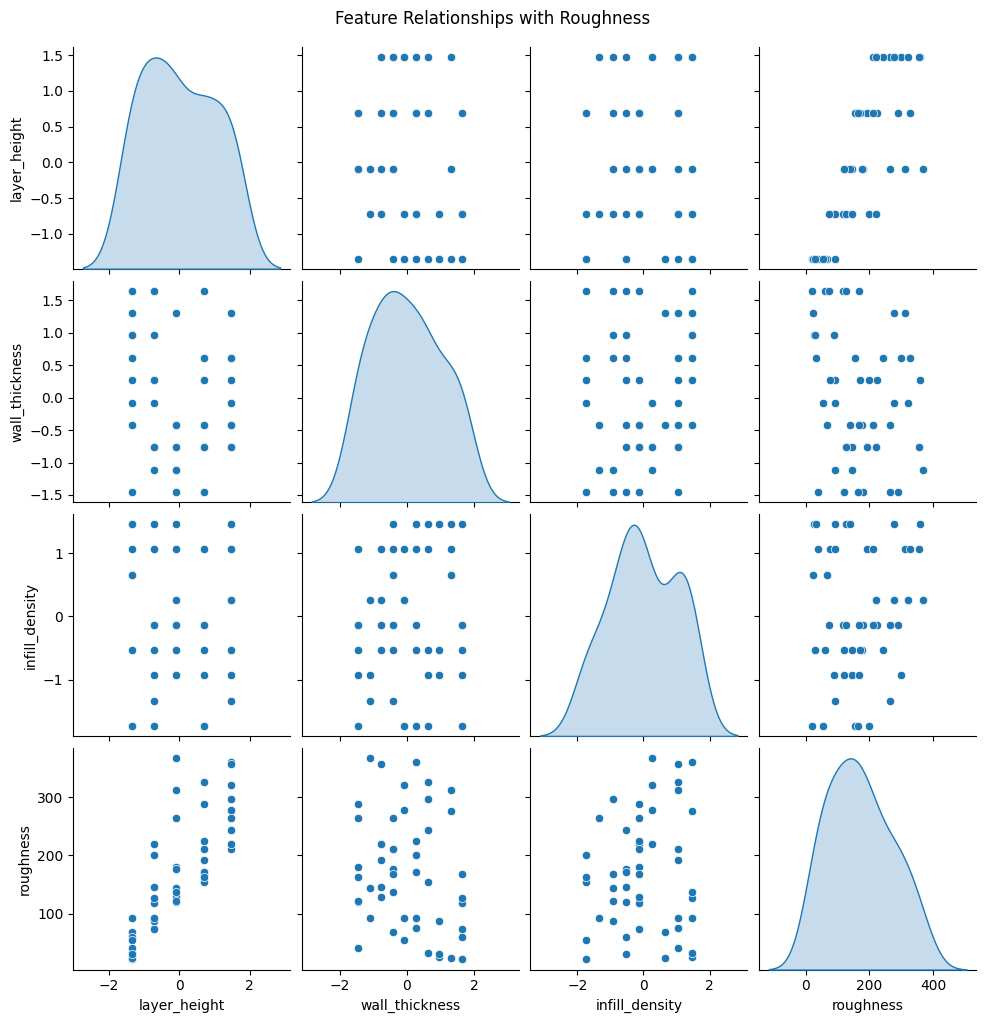

In [ ]:
import seaborn as sns

# Combine features and target into one DataFrame for visualization
data['roughness'] = y
sns.pairplot(data[['layer_height', 'wall_thickness', 'infill_density', 'roughness']], diag_kind='kde', kind='scatter')
plt.suptitle('Feature Relationships with Roughness', y=1.02)
plt.show()


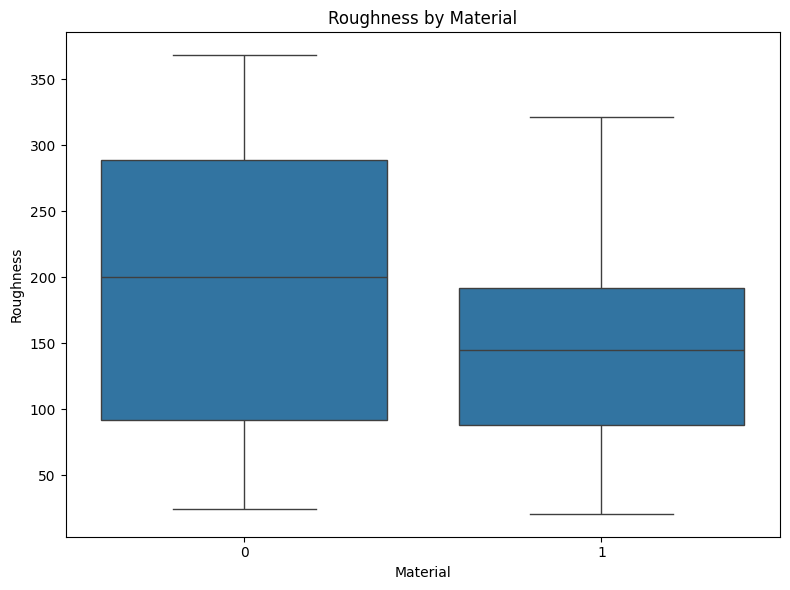

In [ ]:
# Box plot for material vs roughness
plt.figure(figsize=(8, 6))
sns.boxplot(x='material', y='roughness', data=data)
plt.xlabel('Material')
plt.ylabel('Roughness')
plt.title('Roughness by Material')
plt.tight_layout()
plt.show()


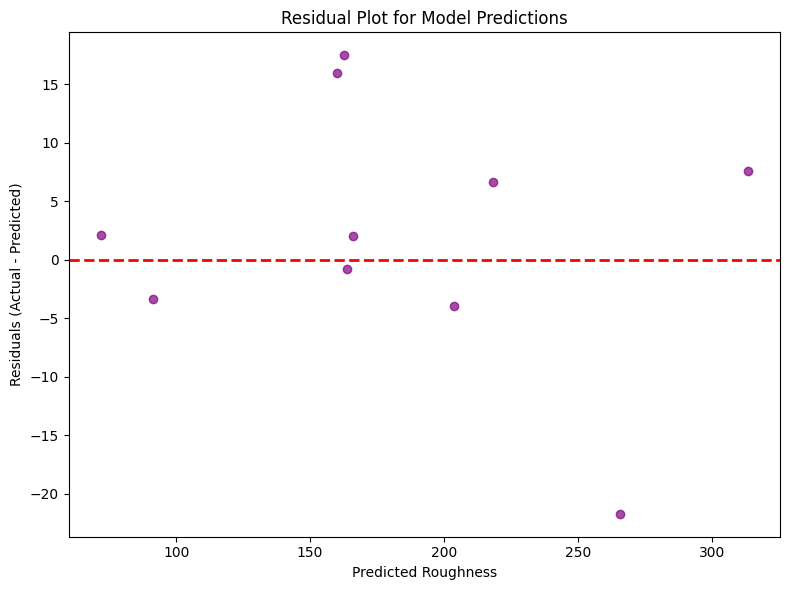

In [ ]:
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Roughness')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Model Predictions')
plt.tight_layout()
plt.show()


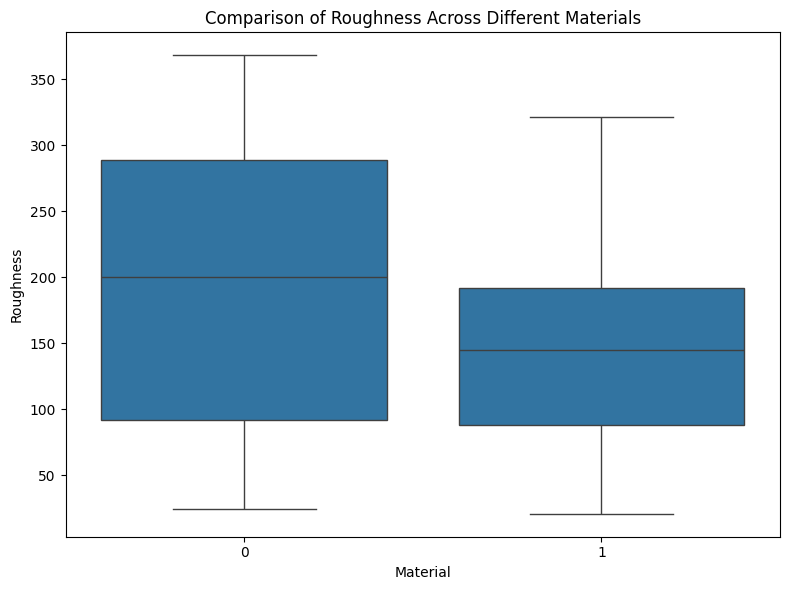

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='material', y='roughness', data=data)
plt.xlabel('Material')
plt.ylabel('Roughness')
plt.title('Comparison of Roughness Across Different Materials')
plt.tight_layout()
plt.show()


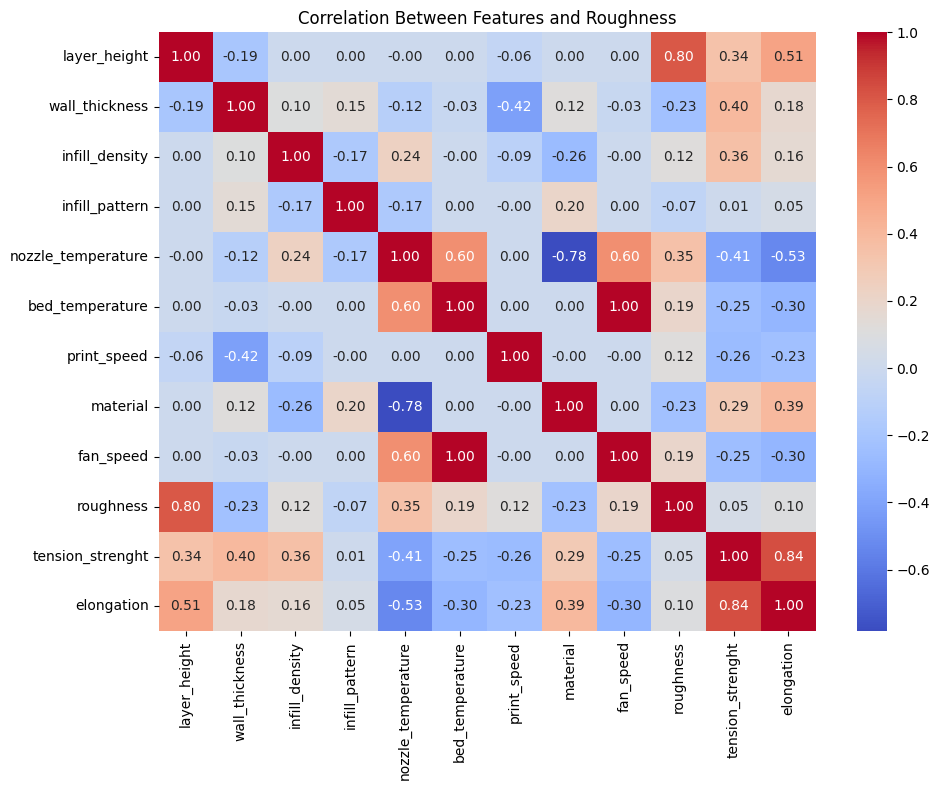

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Between Features and Roughness')
plt.tight_layout()
plt.show()


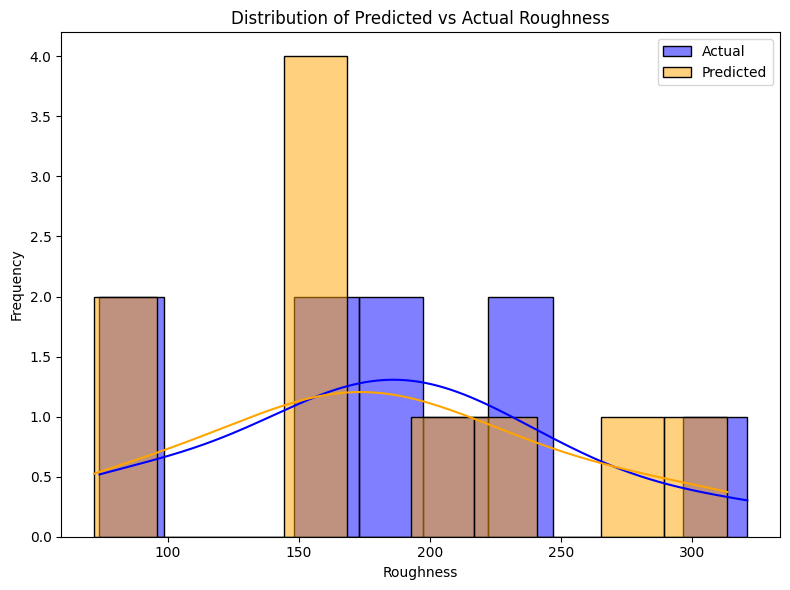

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test, kde=True, color='blue', label='Actual', bins=10)
sns.histplot(y_pred, kde=True, color='orange', label='Predicted', bins=10)
plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs Actual Roughness')
plt.legend()
plt.tight_layout()
plt.show()


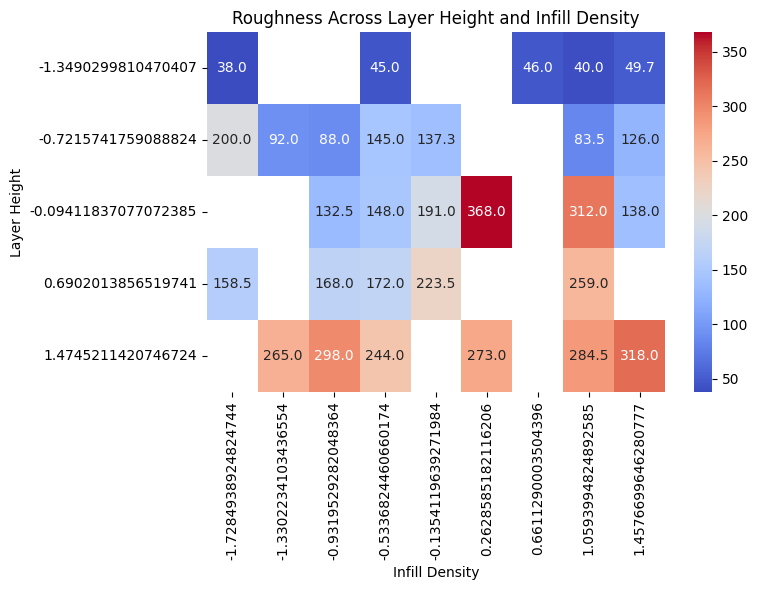

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.pivot_table(index='layer_height', columns='infill_density', values='roughness'), annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Roughness Across Layer Height and Infill Density')
plt.xlabel('Infill Density')
plt.ylabel('Layer Height')
plt.tight_layout()
plt.show()


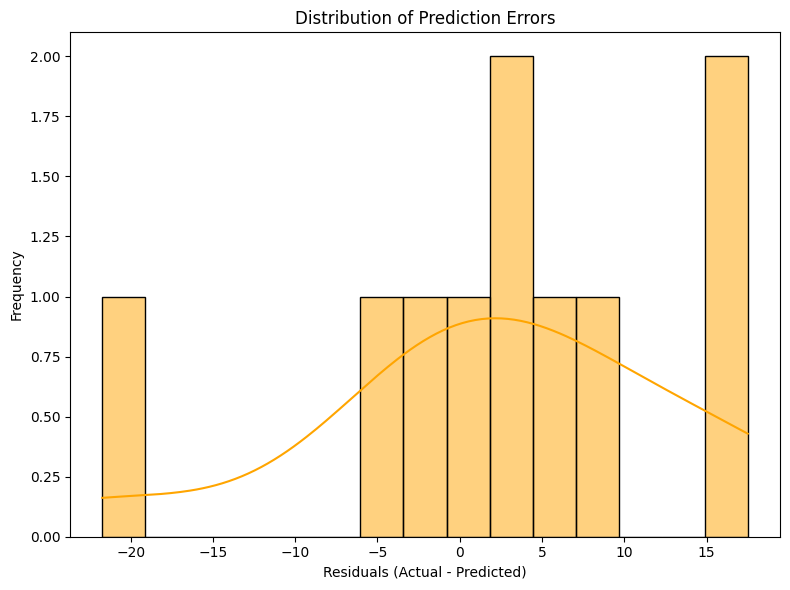

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange', bins=15)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create the table
metric_table = {
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "Root Mean Squared Error (RMSE)", "R² Score"],
    "Description": [
        "Average squared difference between predicted and actual values",
        "Average absolute difference between predicted and actual values",
        "Square root of MSE",
        "Proportion of variance explained by the model"
    ],
    "Value": [mse, mae, rmse, r2]
}

import pandas as pd
metric_df = pd.DataFrame(metric_table)
print(metric_df)


                           Metric  \
0        Mean Squared Error (MSE)   
1       Mean Absolute Error (MAE)   
2  Root Mean Squared Error (RMSE)   
3                        R² Score   

                                         Description       Value  
0  Average squared difference between predicted a...  117.233550  
1  Average absolute difference between predicted ...    8.167000  
2                                 Square root of MSE   10.827444  
3      Proportion of variance explained by the model    0.974734  


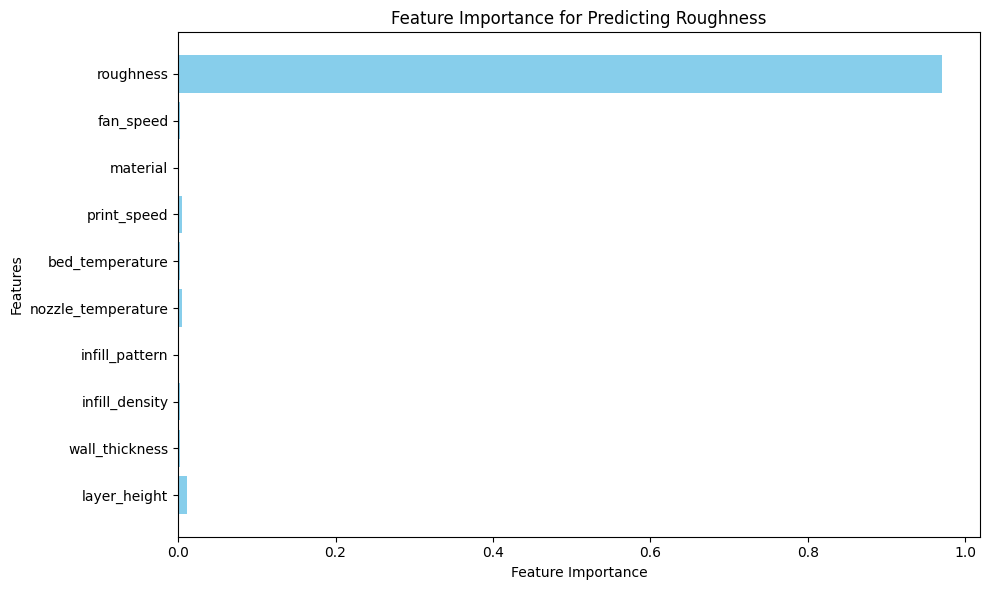

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Predicting Roughness')
plt.tight_layout()
plt.show()


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 24.5 MB/s eta 0:00:00


In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/3Dprinting.v6-augmented.yolov8.zip"
extract_path = "/content/3Dprinting_dataset"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print(f"Dataset extracted to: {extract_path}")


Dataset extracted to: /content/3Dprinting_dataset


In [ ]:
!ls /content/3Dprinting_dataset


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
results = model.val()
print(results)


AttributeError: 'RandomForestRegressor' object has no attribute 'val'

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 Nano model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano is lightweight and faster

# Train the model with optimized parameters
model.train(
    data="/content/3Dprinting_dataset/data.yaml",  # Path to dataset YAML file
    epochs=10,  # Reduced number of epochs for faster training
    imgsz=416,  # Smaller image size to speed up processing
    batch=8,    # Smaller batch size to optimize memory and speed
    name="3Dprinting_defect_detection_fast"  # Unique name for this run
)


In [ ]:
model = YOLO('yolov8n.pt')  # Use the pre-trained YOLOv8 nano model (you can choose other sizes)

# Train the model
model.train(
    data="/content/3Dprinting_dataset/data.yaml",  # Path to dataset YAML file
    epochs=50,  # Number of training epochs
    imgsz=640,  # Image size
    batch=16,   # Batch size
    name="3Dprinting_defect_detection"
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 77.1MB/s]


Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/3Dprinting_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=3Dprinting_defect_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 18.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/3Dprinting_dataset/train/labels... 624 images, 3 backgrounds, 0 corrupt: 100%|██████████| 624/624 [00:00<00:00, 1987.18it/s]

train: New cache created: /content/3Dprinting_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/3Dprinting_dataset/valid/labels... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<00:00, 2145.38it/s]

val: New cache created: /content/3Dprinting_dataset/valid/labels.cache
Plotting labels to runs/detect/3Dprinting_defect_detection/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/3Dprinting_defect_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.982      3.121      1.968         64        640: 100%|██████████| 39/39 [08:43<00:00, 13.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.92s/it]

                   all         48         82    0.00472      0.829     0.0873     0.0256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.975      2.709      1.984         58        640: 100%|██████████| 39/39 [08:44<00:00, 13.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.74s/it]

                   all         48         82     0.0912      0.183     0.0497     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.089      2.741      1.986         58        640: 100%|██████████| 39/39 [08:49<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.31s/it]

                   all         48         82      0.126      0.183     0.0671     0.0273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G       2.08      2.622      1.949         43        640: 100%|██████████| 39/39 [08:52<00:00, 13.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.66s/it]

                   all         48         82     0.0241      0.183     0.0099    0.00241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.038      2.462      1.961         52        640: 100%|██████████| 39/39 [08:55<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.10s/it]

                   all         48         82     0.0794      0.232     0.0398    0.00979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G       2.05       2.39      1.955         61        640: 100%|██████████| 39/39 [08:47<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.85s/it]

                   all         48         82      0.127       0.22     0.0786      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      2.048      2.379      1.914         31        640: 100%|██████████| 39/39 [08:47<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.52s/it]

                   all         48         82      0.243      0.244      0.139     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.948      2.223      1.872         48        640: 100%|██████████| 39/39 [08:42<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.89s/it]

                   all         48         82      0.131      0.171      0.084     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.915        2.2      1.838         48        640: 100%|██████████| 39/39 [08:44<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.61s/it]

                   all         48         82      0.423      0.183      0.225     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.899      2.176      1.805         39        640: 100%|██████████| 39/39 [08:54<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.02s/it]

                   all         48         82      0.276      0.317      0.179     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.881      2.048      1.784         55        640: 100%|██████████| 39/39 [08:52<00:00, 13.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.88s/it]

                   all         48         82      0.499      0.305      0.308      0.095



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G       1.84      1.985      1.743         50        640: 100%|██████████| 39/39 [08:50<00:00, 13.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.88s/it]

                   all         48         82      0.347      0.305      0.188     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.822      2.024      1.754         50        640: 100%|██████████| 39/39 [08:48<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.62s/it]

                   all         48         82       0.34      0.366      0.265     0.0731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.824      1.999       1.77         47        640: 100%|██████████| 39/39 [08:44<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.25s/it]

                   all         48         82       0.25      0.256      0.207     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.764      1.898      1.718         56        640: 100%|██████████| 39/39 [08:37<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.31s/it]

                   all         48         82      0.413      0.429      0.355      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.735      1.807      1.677         50        640: 100%|██████████| 39/39 [08:25<00:00, 12.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.13s/it]

                   all         48         82      0.568      0.384      0.338      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.694      1.769      1.662         50        640: 100%|██████████| 39/39 [08:29<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.73s/it]

                   all         48         82       0.55      0.366       0.37      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.704      1.722      1.633         42        640: 100%|██████████| 39/39 [08:27<00:00, 13.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.67s/it]

                   all         48         82      0.529      0.317      0.313       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.629       1.63      1.618         31        640: 100%|██████████| 39/39 [08:43<00:00, 13.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.71s/it]

                   all         48         82      0.329      0.329      0.267     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.657      1.646      1.628         48        640: 100%|██████████| 39/39 [08:35<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.90s/it]

                   all         48         82      0.405      0.305      0.262      0.087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.633      1.605      1.611         61        640: 100%|██████████| 39/39 [08:37<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.22s/it]

                   all         48         82      0.286      0.378      0.208     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.652      1.607      1.595         46        640: 100%|██████████| 39/39 [08:48<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.95s/it]

                   all         48         82      0.455      0.295      0.264     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.625      1.586      1.595         52        640: 100%|██████████| 39/39 [08:57<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.95s/it]

                   all         48         82      0.427      0.341        0.3      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.587      1.517      1.561         49        640: 100%|██████████| 39/39 [08:45<00:00, 13.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.48s/it]

                   all         48         82      0.454       0.39      0.329      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.572      1.432      1.544         49        640: 100%|██████████| 39/39 [08:56<00:00, 13.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.47s/it]

                   all         48         82      0.419      0.415      0.325      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.549      1.382      1.507         50        640: 100%|██████████| 39/39 [08:51<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.47s/it]

                   all         48         82      0.361      0.378      0.288      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G        1.5      1.337      1.486         44        640: 100%|██████████| 39/39 [08:50<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.13s/it]

                   all         48         82      0.407      0.393      0.327     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G       1.51      1.325      1.494         40        640: 100%|██████████| 39/39 [08:46<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.93s/it]

                   all         48         82      0.324      0.427      0.291      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.469      1.311      1.476         48        640: 100%|██████████| 39/39 [08:49<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.90s/it]

                   all         48         82      0.359      0.511       0.38      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.462      1.265      1.457         49        640: 100%|██████████| 39/39 [08:50<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.84s/it]

                   all         48         82      0.366      0.388      0.286      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.408      1.225      1.419         55        640: 100%|██████████| 39/39 [08:49<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.69s/it]

                   all         48         82      0.356      0.412      0.309      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.379      1.151      1.388         41        640: 100%|██████████| 39/39 [08:52<00:00, 13.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.52s/it]

                   all         48         82       0.39      0.406      0.307      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.357      1.131      1.389         47        640: 100%|██████████| 39/39 [08:53<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.63s/it]

                   all         48         82      0.466      0.415      0.368      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.403       1.14      1.408         64        640: 100%|██████████| 39/39 [08:50<00:00, 13.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.51s/it]

                   all         48         82       0.42      0.305      0.286      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.368      1.106      1.389         42        640: 100%|██████████| 39/39 [08:47<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.86s/it]

                   all         48         82       0.51      0.329      0.317       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.341       1.11      1.365         30        640: 100%|██████████| 39/39 [08:44<00:00, 13.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.83s/it]

                   all         48         82      0.448      0.451      0.364      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.334      1.073      1.376         46        640: 100%|██████████| 39/39 [08:47<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.71s/it]

                   all         48         82      0.433      0.439      0.366      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.289      1.069      1.336         70        640: 100%|██████████| 39/39 [08:53<00:00, 13.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.91s/it]

                   all         48         82      0.471      0.366      0.359      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.279      1.006      1.316         45        640: 100%|██████████| 39/39 [08:41<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.40s/it]

                   all         48         82      0.561      0.341      0.356      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.254      1.002      1.308         45        640: 100%|██████████| 39/39 [08:46<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.96s/it]

                   all         48         82      0.662      0.451      0.424      0.148


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.201     0.8882      1.273         37        640: 100%|██████████| 39/39 [08:50<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.52s/it]

                   all         48         82      0.448      0.451      0.366      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.156     0.8272      1.261         33        640: 100%|██████████| 39/39 [08:15<00:00, 12.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.76s/it]

                   all         48         82      0.428      0.415      0.361      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.088     0.7841      1.208         23        640: 100%|██████████| 39/39 [08:16<00:00, 12.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.86s/it]

                   all         48         82      0.488      0.396      0.373      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.079     0.7612      1.194         31        640: 100%|██████████| 39/39 [08:25<00:00, 12.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.41s/it]

                   all         48         82      0.601      0.427        0.4      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.083     0.7634       1.21         31        640: 100%|██████████| 39/39 [08:38<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.51s/it]

                   all         48         82       0.61      0.415      0.398      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.072     0.7431      1.191         30        640: 100%|██████████| 39/39 [08:37<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.38s/it]

                   all         48         82      0.502      0.378      0.367      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.039      0.711      1.162         29        640:  26%|██▌       | 10/39 [02:11<06:18, 13.06s/it]